# $\textbf{Circular Trade Detection using Node2Vec}$

Run first two code cells and restart the runtime (to ensure we are using the latest numpy version). Then run the remaining code cells.

In [47]:
!pip install node2vec

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [48]:
!pip install --upgrade numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [49]:
import numpy as np
import networkx as nx
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from node2vec import Node2Vec

# $\textbf{Dataset Description}$

Basic statistics:
           Seller ID       Buyer ID         Value
count  130535.000000  130535.000000  1.305350e+05
mean     1309.358287    1182.851258  6.930965e+05
std       294.435026     169.809657  5.696676e+05
min      1001.000000    1001.000000  1.000600e+04
25%      1078.000000    1060.000000  2.361085e+05
50%      1214.000000    1112.000000  5.571960e+05
75%      1488.000000    1276.000000  1.074405e+06
max      2190.000000    1887.000000  2.124000e+07

Missing values:
Seller ID    0
Buyer ID     0
Value        0
dtype: int64

Unique values:
Seller ID       703
Buyer ID        371
Value        112661
dtype: int64

Correlations:
           Seller ID  Buyer ID     Value
Seller ID   1.000000  0.041227 -0.208444
Buyer ID    0.041227  1.000000 -0.135746
Value      -0.208444 -0.135746  1.000000

Value frequency:
1051    4251
1034    4058
1328    3136
1090    2909
1079    2582
        ... 
1158       1
1882       1
1571       1
2145       1
1372       1
Name: Seller ID, Length: 703

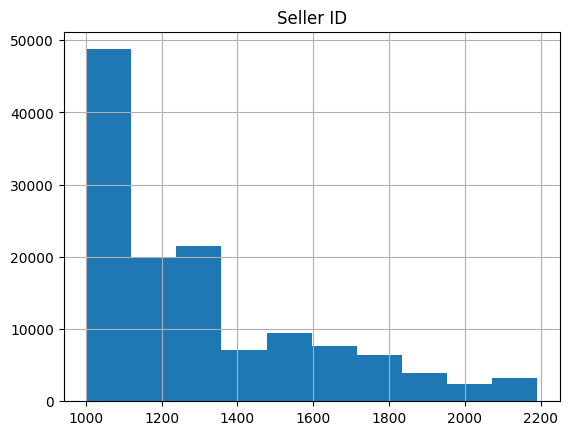

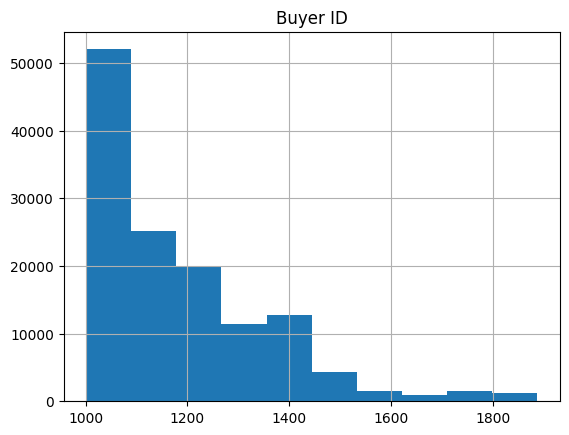

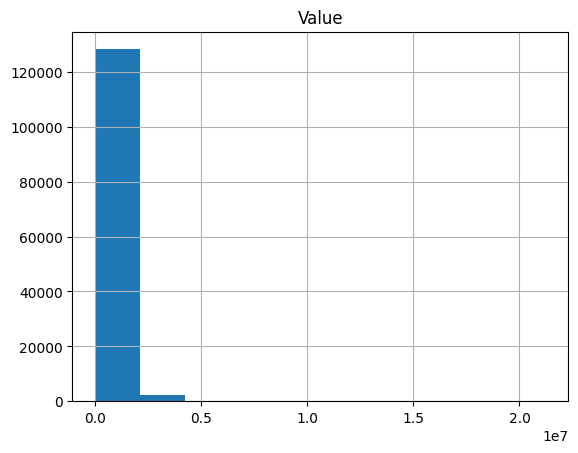


Boxplots:


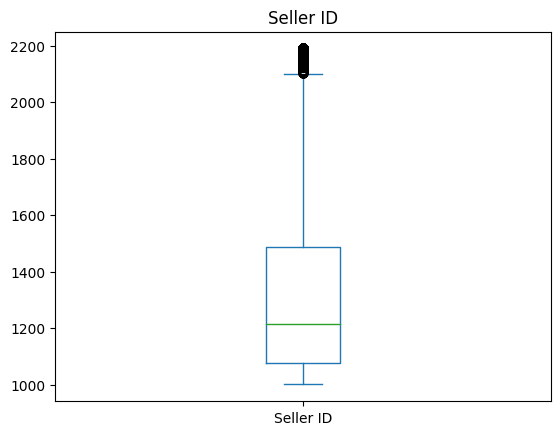

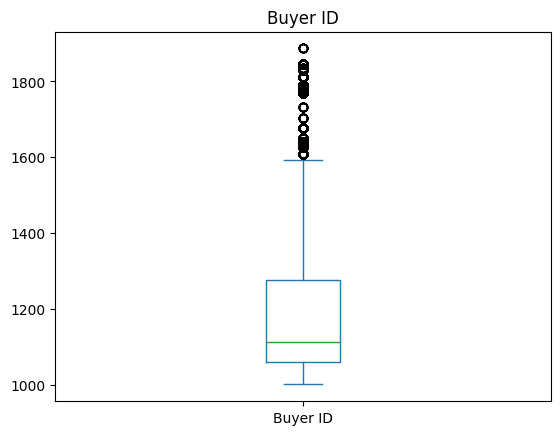

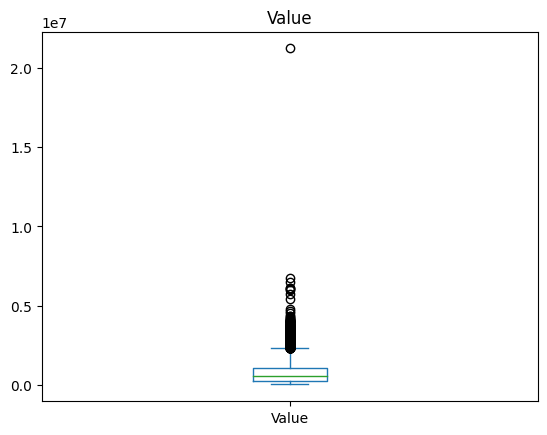

In [50]:
# Load the data into a pandas DataFrame
dataset = pd.read_csv('Iron_dealers_data.csv')

## Basic statistics
print("Basic statistics:")
print(dataset.describe(include='all'))

## Missing values
print("\nMissing values:")
print(dataset.isnull().sum())

## Unique values
print("\nUnique values:")
print(dataset.nunique())

## Correlations
print("\nCorrelations:")
print(dataset.corr())

## Value frequency
print("\nValue frequency:")
for col in dataset.columns:
    print(dataset[col].value_counts())

## Histograms
print("\nHistograms:")
for col in dataset.columns:
    dataset[col].hist()
    plt.title(col)
    plt.show()

## Boxplots
print("\nBoxplots:")
for col in dataset.columns:
    dataset[col].plot(kind='box')
    plt.title(col)
    plt.show()

In [51]:
# Dataset statistics
print("Dataset statistics:")
print(f"Number of variables:\t\t{len(dataset.columns)}")
print(f"Number of observations:\t\t{len(dataset)}")
print(f"Missing cells:\t\t\t{dataset.isnull().sum().sum()}")
print(f"Missing cells (%):\t\t{dataset.isnull().sum().sum() / (len(dataset) * len(dataset.columns)):.1%}")
duplicated_rows = dataset[dataset.duplicated()]
print(f"Duplicate rows:\t\t\t{len(duplicated_rows)}")
print(f"Duplicate rows (%):\t\t{len(duplicated_rows) / len(dataset):.1%}")
print(f"Total size in memory:\t\t{dataset.memory_usage(deep=True).sum() / (1024*1024):.1f} MiB")
print(f"Average record size in memory:\t{dataset.memory_usage(deep=True).sum() / len(dataset):.1f} B")

Dataset statistics:
Number of variables:		3
Number of observations:		130535
Missing cells:			0
Missing cells (%):		0.0%
Duplicate rows:			7386
Duplicate rows (%):		5.7%
Total size in memory:		3.0 MiB
Average record size in memory:	24.0 B


In [52]:
# Variables statistics
for col in dataset.columns:
    print(f"\nVariable: {col}")
    print(f"Distinct:\t{dataset[col].nunique()}")
    print(f"Distinct (%):\t{dataset[col].nunique() / len(dataset):.1%}")
    print(f"Missing:\t{dataset[col].isnull().sum()}")
    print(f"Missing (%):\t{dataset[col].isnull().sum() / len(dataset):.1%}")
    print(f"Infinite:\t{np.isinf(dataset[col]).sum()}")
    print(f"Infinite (%):\t{np.isinf(dataset[col]).sum() / len(dataset):.1%}")
    print(f"Mean:\t\t{dataset[col].mean()}")
    print(f"Minimum:\t{dataset[col].min()}")
    print(f"Maximum:\t{dataset[col].max()}")
    print(f"Zeros:\t\t{len(dataset[dataset[col] == 0])}")
    print(f"Zeros (%):\t{len(dataset[dataset[col] == 0]) / len(dataset):.1%}")
    print(f"Negative:\t{len(dataset[dataset[col] < 0])}")
    print(f"Negative (%):\t{len(dataset[dataset[col] < 0]) / len(dataset):.1%}")
    print(f"Memory size:\t{dataset[col].memory_usage(deep=True) / (1024):.1f} KiB")


Variable: Seller ID
Distinct:	703
Distinct (%):	0.5%
Missing:	0
Missing (%):	0.0%
Infinite:	0
Infinite (%):	0.0%
Mean:		1309.3582870494504
Minimum:	1001
Maximum:	2190
Zeros:		0
Zeros (%):	0.0%
Negative:	0
Negative (%):	0.0%
Memory size:	1019.9 KiB

Variable: Buyer ID
Distinct:	371
Distinct (%):	0.3%
Missing:	0
Missing (%):	0.0%
Infinite:	0
Infinite (%):	0.0%
Mean:		1182.851258283219
Minimum:	1001
Maximum:	1887
Zeros:		0
Zeros (%):	0.0%
Negative:	0
Negative (%):	0.0%
Memory size:	1019.9 KiB

Variable: Value
Distinct:	112661
Distinct (%):	86.3%
Missing:	0
Missing (%):	0.0%
Infinite:	0
Infinite (%):	0.0%
Mean:		693096.4753518979
Minimum:	10006.0
Maximum:	21240000.0
Zeros:		0
Zeros (%):	0.0%
Negative:	0
Negative (%):	0.0%
Memory size:	1019.9 KiB


Variable: Seller ID



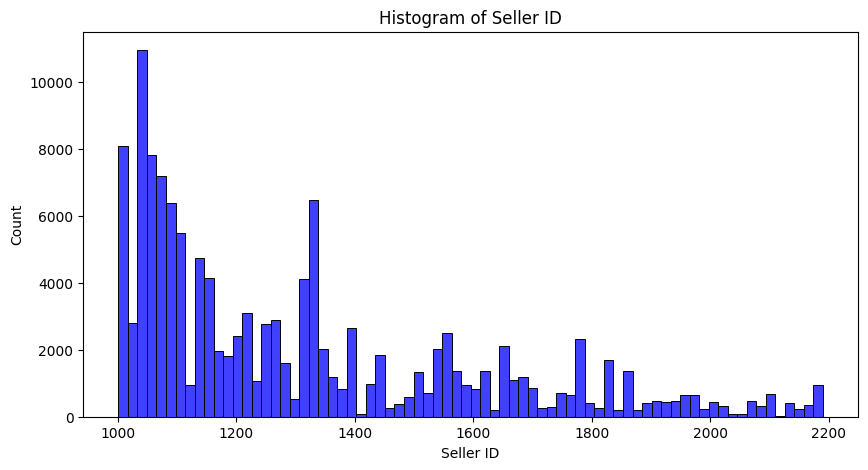

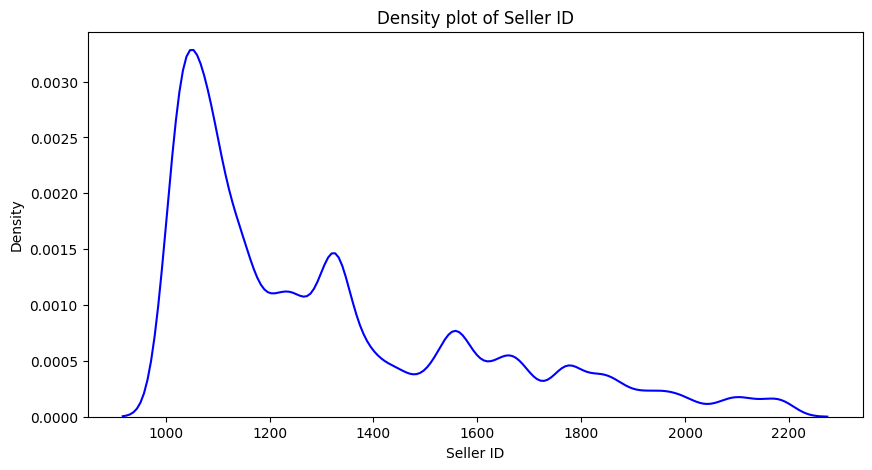

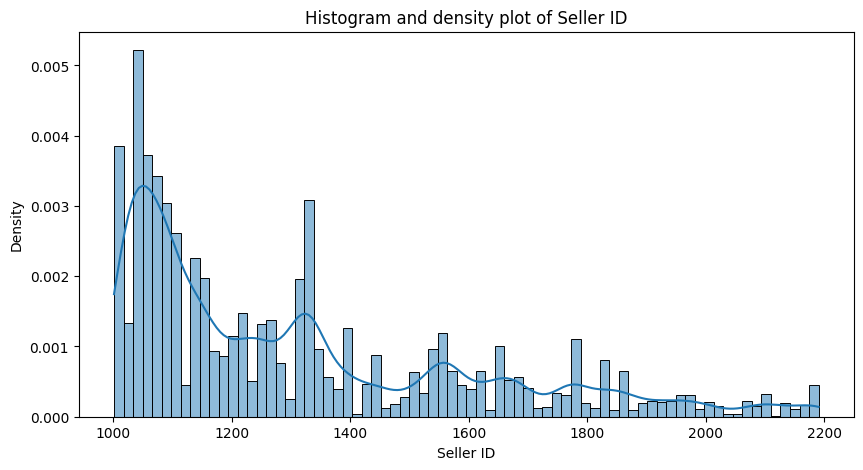

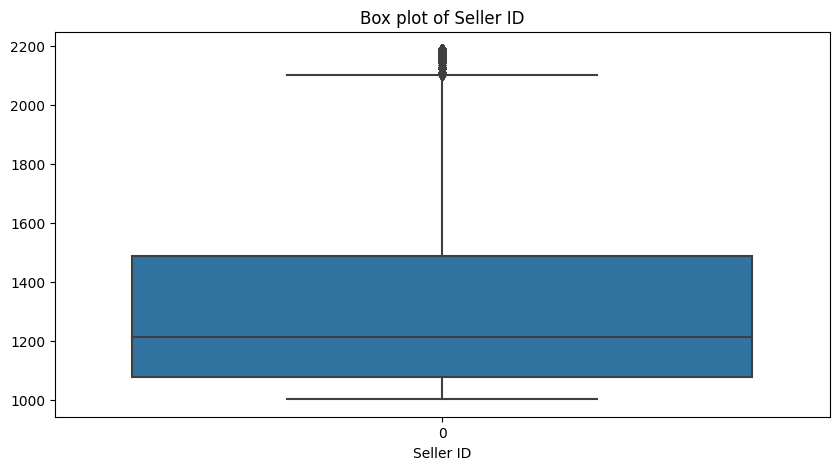

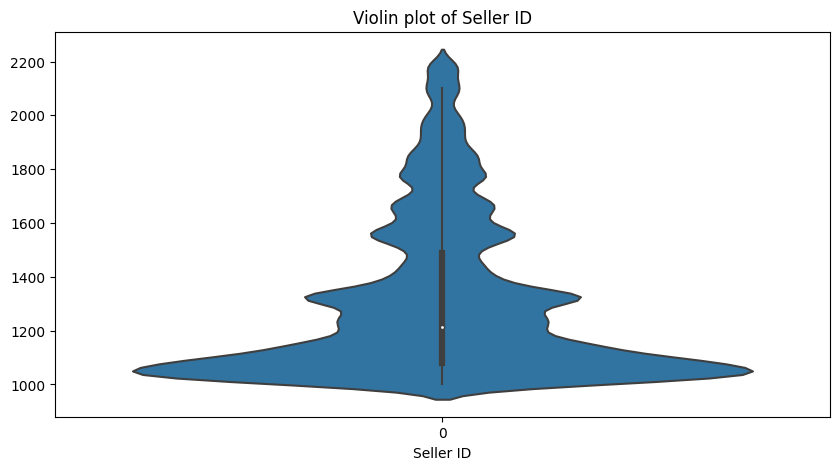

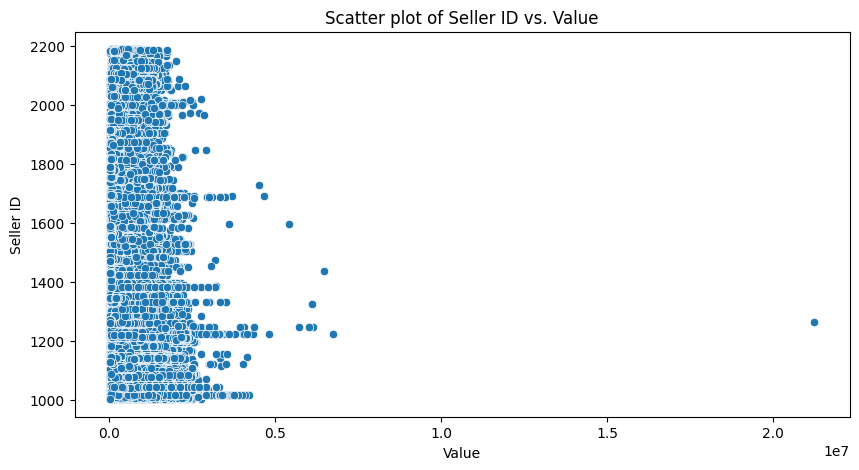

Variable: Buyer ID



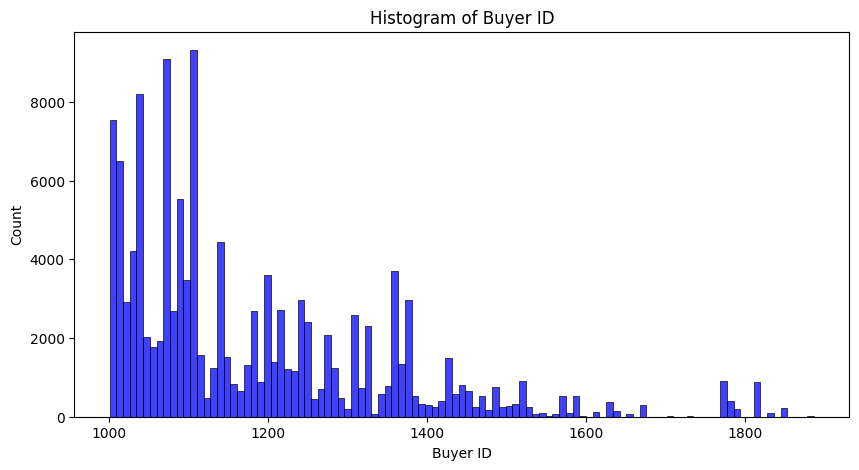

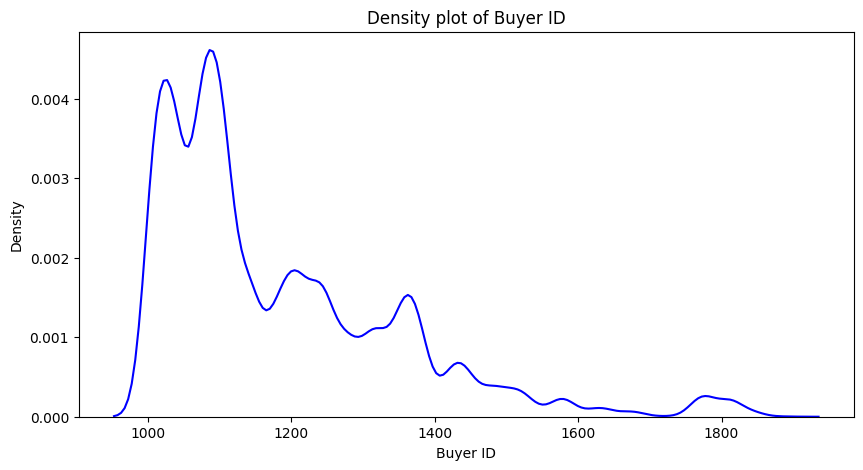

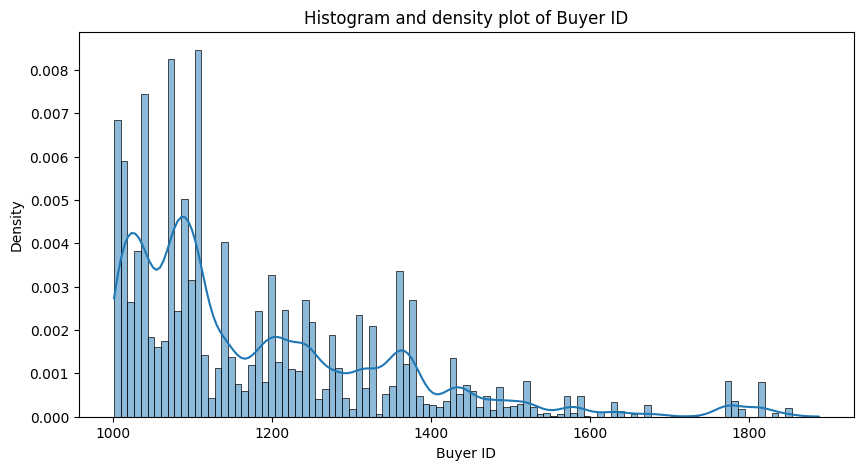

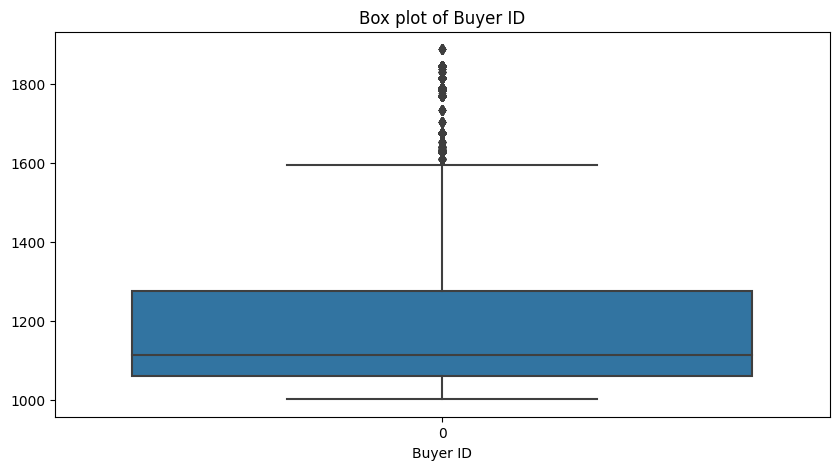

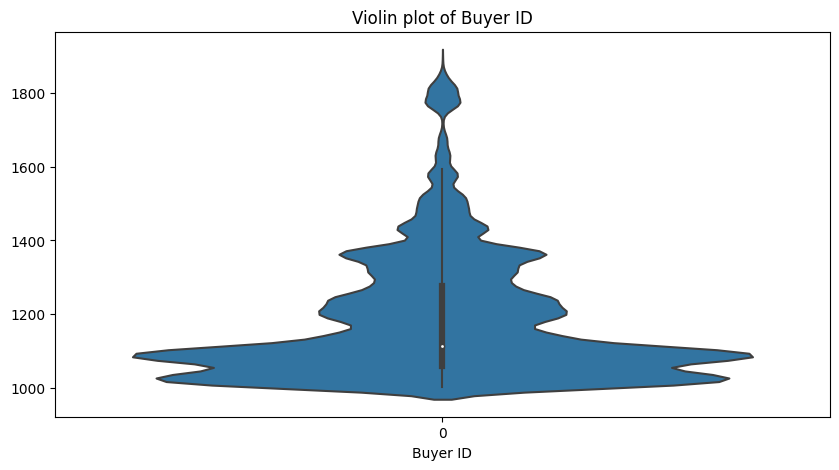

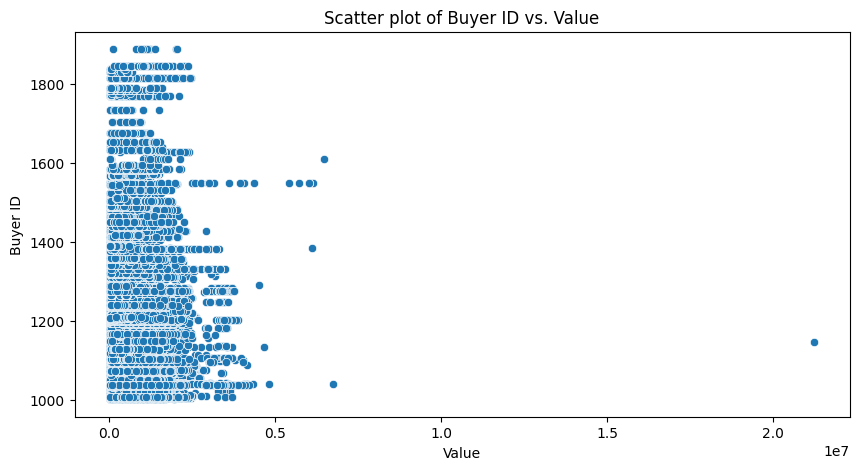

Variable: Value



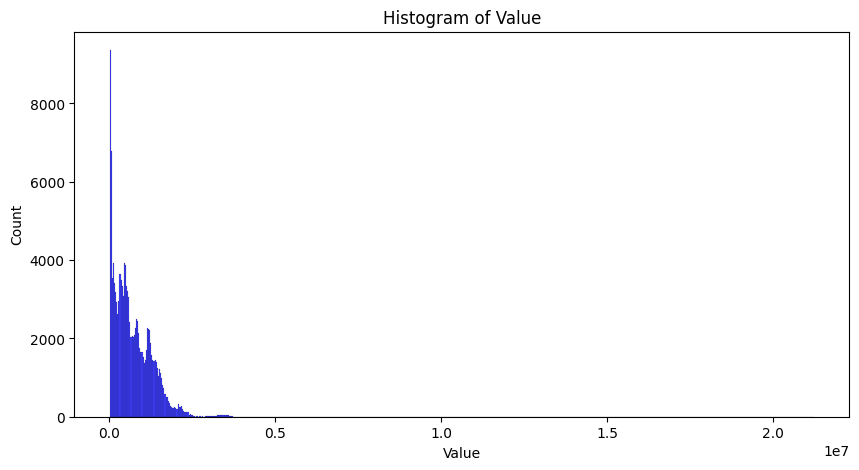

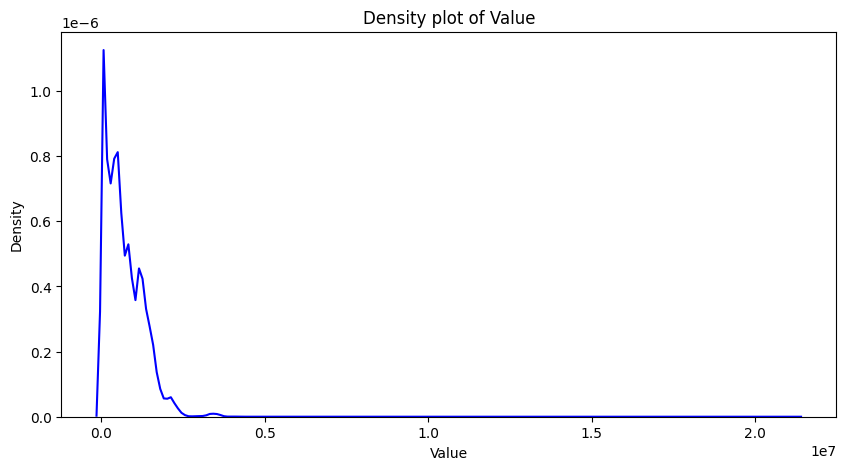

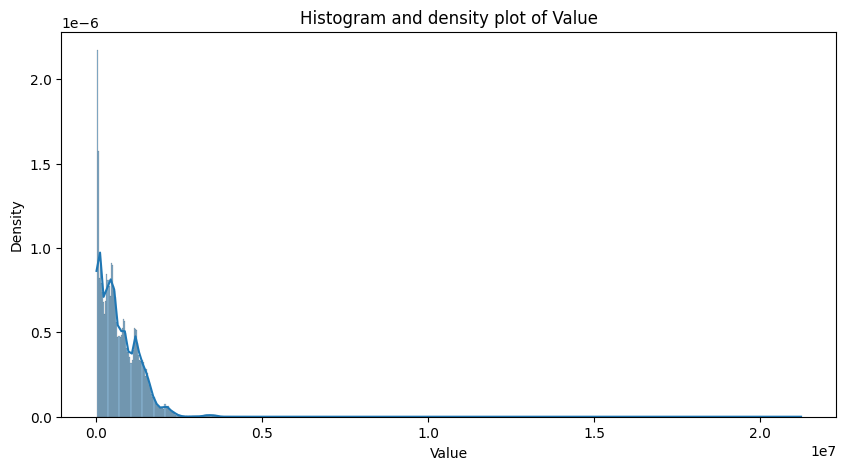

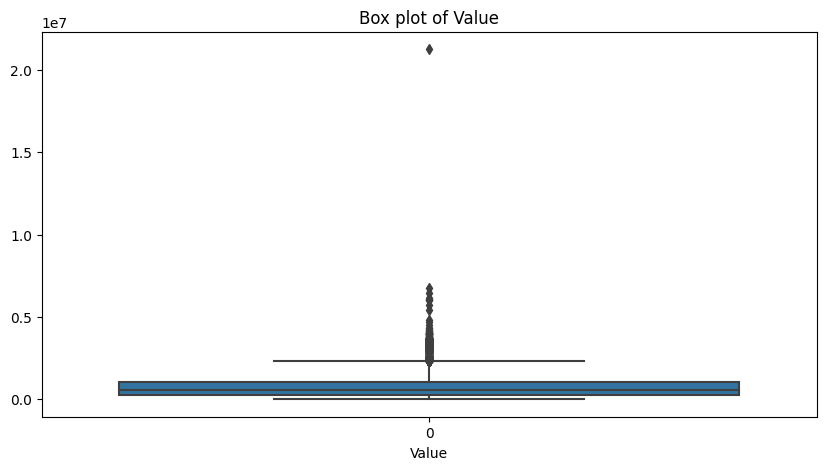

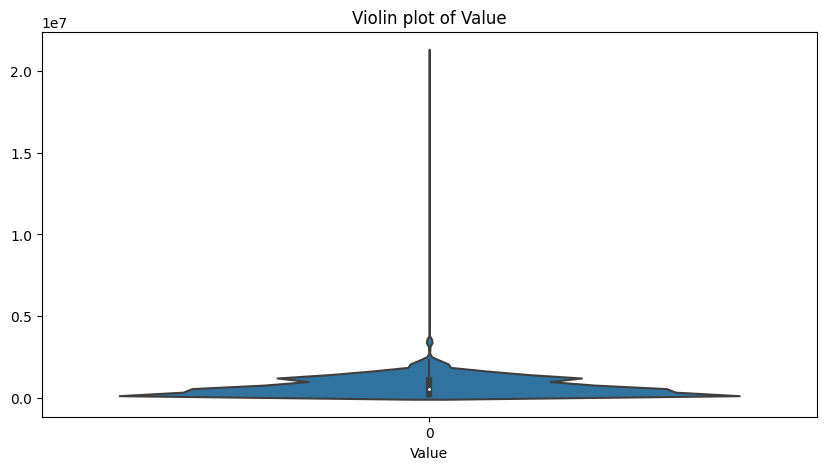

<Figure size 1000x1000 with 0 Axes>

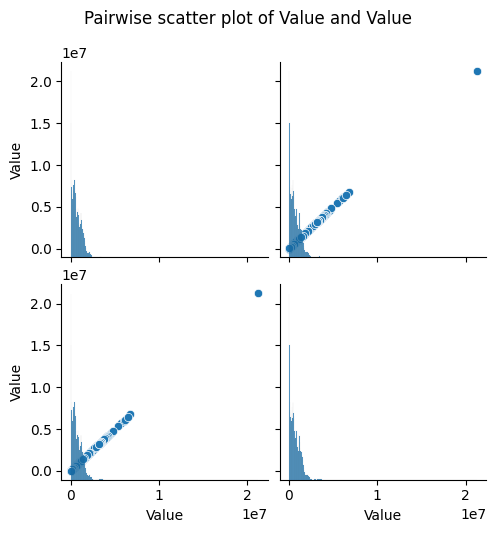

In [53]:
# Visualizations for each variable
for col in dataset.columns:
    print(f"Variable: {col}\n")

    # Histogram
    plt.figure(figsize=(10, 5))
    sns.histplot(dataset[col], kde=False, color="blue")
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

    # Density plot
    plt.figure(figsize=(10, 5))
    sns.kdeplot(dataset[col], color="blue")
    plt.title(f"Density plot of {col}")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.show()

    # Histogram and density plot
    plt.figure(figsize=(10, 5))
    sns.histplot(dataset[col], kde=True, stat="density")
    plt.title(f"Histogram and density plot of {col}")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.show()
    
    # Box plot
    plt.figure(figsize=(10, 5))
    sns.boxplot(dataset[col])
    plt.title(f"Box plot of {col}")
    plt.xlabel(col)
    plt.show()
    
    # Violin plot
    plt.figure(figsize=(10, 5))
    sns.violinplot(dataset[col])
    plt.title(f"Violin plot of {col}")
    plt.xlabel(col)
    plt.show()

    # Scatter plot
    if col != "Value":
      plt.figure(figsize=(10, 5))
      sns.scatterplot(x="Value", y=col, data=dataset)
      plt.title(f"Scatter plot of {col} vs. Value")
      plt.xlabel("Value")
      plt.ylabel(col)
      plt.show()

# Pairwise scatter plot
plt.figure(figsize=(10, 10))
sns.pairplot(data=dataset, vars=[col, "Value"])
plt.suptitle(f"Pairwise scatter plot of {col} and Value", y=1.05)
plt.show()

Interaction between Seller ID and Buyer ID


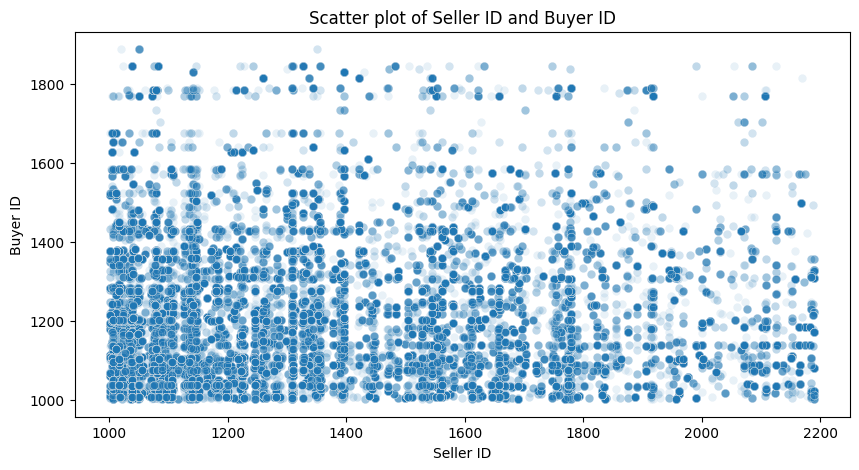

Correlation coefficients:
Spearman's correlation:	0.070
Pearson's correlation:	0.041
Kendall's correlation:	0.048
Missing values:
Seller ID    0
Buyer ID     0
dtype: int64


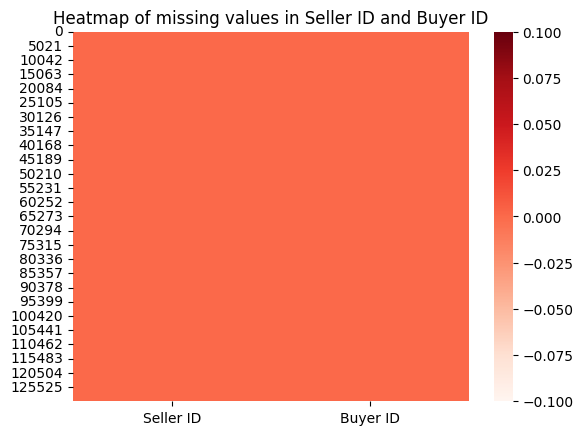

Duplicate rows:		125177

Interaction between Seller ID and Value


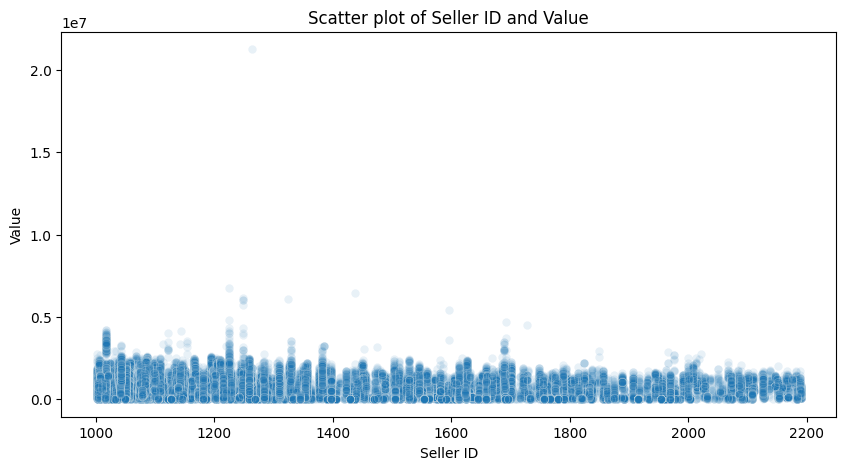

Correlation coefficients:
Spearman's correlation:	-0.229
Pearson's correlation:	-0.208
Kendall's correlation:	-0.153
Missing values:
Seller ID    0
Value        0
dtype: int64


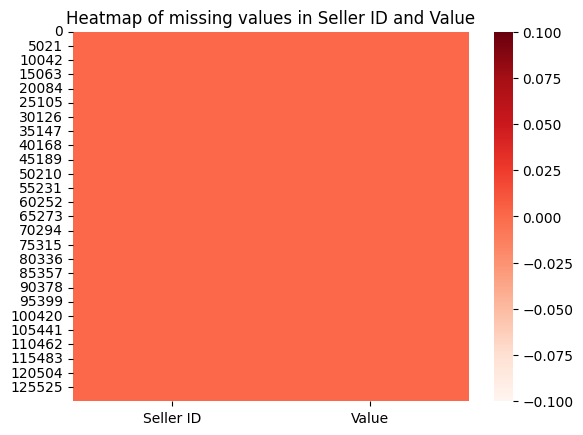

Duplicate rows:		8511

Interaction between Buyer ID and Value


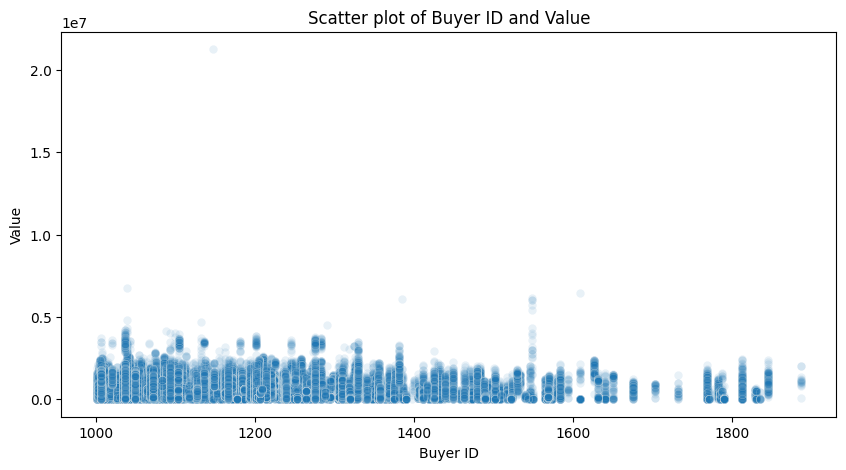

Correlation coefficients:
Spearman's correlation:	-0.151
Pearson's correlation:	-0.136
Kendall's correlation:	-0.101
Missing values:
Buyer ID    0
Value       0
dtype: int64


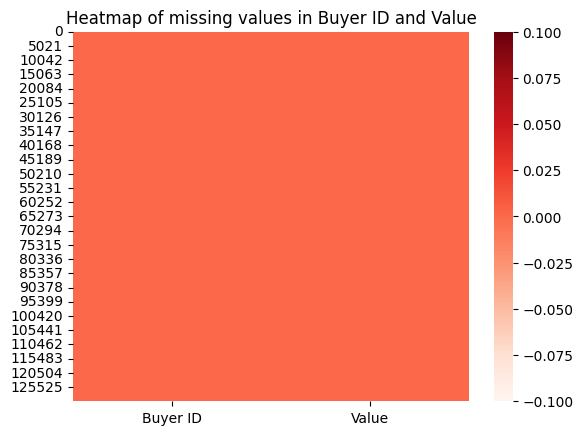

Duplicate rows:		8148



In [54]:
# Interactions between 2 columns
for i in range(len(dataset.columns) - 1):
    for j in range(i + 1, len(dataset.columns)):
        col1, col2 = dataset.columns[i], dataset.columns[j]
        print(f"Interaction between {col1} and {col2}")
        
        # Scatter plot
        plt.figure(figsize=(10, 5))
        sns.scatterplot(x=col1, y=col2, data=dataset, alpha=0.1)
        plt.title(f"Scatter plot of {col1} and {col2}")
        plt.xlabel(col1)
        plt.ylabel(col2)
        plt.show()

        # Correlation coefficients
        print("Correlation coefficients:")
        corr_spearman = dataset[[col1, col2]].corr(method="spearman").iloc[0, 1]
        print(f"Spearman's correlation:\t{corr_spearman:.3f}")
        corr_pearson = dataset[[col1, col2]].corr(method="pearson").iloc[0, 1]
        print(f"Pearson's correlation:\t{corr_pearson:.3f}")
        corr_kendall = dataset[[col1, col2]].corr(method="kendall").iloc[0, 1]
        print(f"Kendall's correlation:\t{corr_kendall:.3f}")
        
        # Phi coefficient for categorical variables
        if len(dataset[col1].unique()) <= 2 and len(dataset[col2].unique()) <= 2:
            cont_table = pd.crosstab(dataset[col1], dataset[col2])
            phi_k = np.sqrt(cont_table.sum().sum() * cont_table.iloc[1, 1] * cont_table.iloc[0, 0] * cont_table.iloc[1, 0] /
                              (cont_table.iloc[0, 1] * cont_table.iloc[1, 0] * cont_table.iloc[0, 0] * cont_table.iloc[1, 1]))
            print(f"Phi coefficient:\t\t{phi_k:.3f}")
            
        # Missing values
        print(f"Missing values:")
        print(dataset[[col1, col2]].isna().sum())
        sns.heatmap(dataset[[col1, col2]].isna(), cmap="Reds")
        plt.title(f"Heatmap of missing values in {col1} and {col2}")
        plt.show()
        
        # Duplicate rows
        print(f"Duplicate rows:\t\t{dataset.duplicated([col1, col2]).sum()}\n")

# $\textbf{Algorithm and Results}$

In [55]:
G = nx.from_pandas_edgelist(dataset,source = 'Seller ID',target = 'Buyer ID',edge_attr = ['Value'],create_using=nx.MultiDiGraph())
print(G)

MultiDiGraph with 799 nodes and 130535 edges


In [56]:
def get_common_neighbours(u,v):
    return set(G.successors(v)).intersection(G.predecessors(u))

G = nx.DiGraph(G)
error = 0.1
Interm_G = G.to_undirected()

def check_same_edges_2(u,v):
    values1 = (G[u][v]['Value'])
    values2 = (G[v][u]['Value'])
    if ((values2-values1)/values1) <= error:
        return 2
    return 1

def check_same_edges_3(u,v,p):
    res = 1
    values1 = (G[u][v]['Value'])
    values2 = (G[v][p]['Value'])
    values3 = (G[p][u]['Value'])
    if ((values2-values1)/values1) <= error:
        res = res + 1
    if ((values3-values2)/values2) <= error:
        res = res + 1
    if ((values1-values3)/values3) <= error:
        res = res + 1
    
    if res == 2 or res == 3:
        return 2
    elif res == 4:
        return 3
    return 1
        
def Total_weight(u,v):
    Common_nodes = get_common_neighbours(u,v)
    wgt = 0
    #print(G[u][v])
    if len(Common_nodes) == 0:
          if G.has_edge(v,u):
                if check_same_edges_2(u,v) != 0:
                    return check_same_edges_2(u,v)
    else:
        for p in Common_nodes:
            wgt = wgt + check_same_edges_3(u,v,p)
    return wgt

UG = nx.Graph()

for edge in Interm_G.edges():
    if G.has_edge(edge[0], edge[1]):
        u = edge[0]
        v = edge[1]
    else:
        u = edge[1]
        v = edge[0]
    wgt1 = Total_weight(u,v)
    wgt2 = 0
    if G.has_edge(v,u):
        wgt2 = Total_weight(v,u)
    wgt = 0
    if wgt1 > wgt2:
        wgt = wgt1
    else:
        wgt = wgt2
    UG.add_edge(u,v,weight=wgt)

G = UG
print(G)     

Graph with 799 nodes and 5040 edges


In [87]:
node2vec_model = Node2Vec(G,dimensions = 5,p = 5,q = 1,walk_length = 80,weight_key = 'Value').fit(window = 1,min_count = 1,batch_words = 4)

Computing transition probabilities:   0%|          | 0/799 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:06<00:00,  1.61it/s]


In [88]:
dataset_embedded = pd.DataFrame([node2vec_model.wv.get_vector(str(node)) for node in G.nodes()],index = G.nodes())
dataset_embedded

,0,1,2,3,4
1309,-0.780798,0.574160,0.786595,-1.097496,-0.605836
1011,-0.657869,0.553369,0.626113,-1.175561,-0.426798
1003,-0.558583,0.922457,2.119071,0.006622,-1.295290
1004,-0.527074,1.390421,1.607861,-0.082793,0.411548
1098,0.115987,0.176612,0.817829,-0.550862,-0.066554
...,...,...,...,...,...
1673,1.269387,-0.696926,1.115530,-2.266215,-1.782970
1616,-0.017184,0.296672,1.287167,-1.617534,-2.712301
2025,0.192668,0.499368,0.455780,-3.174167,-1.237639
1870,1.029210,0.376096,2.125084,-0.205048,1.357370


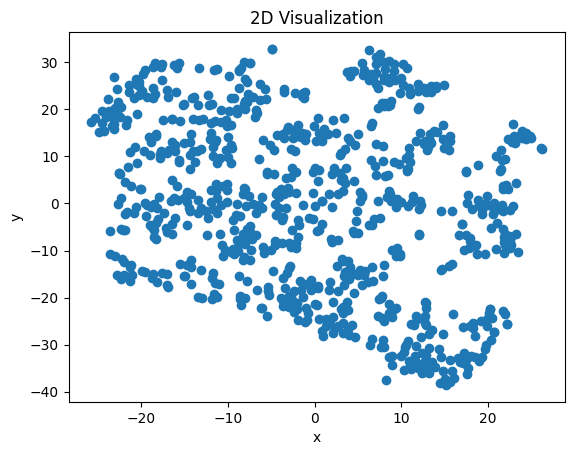

In [89]:
from sklearn.manifold import TSNE
tsne_model = TSNE(n_components = 2)
dataset_embedded_tsne = pd.DataFrame(tsne_model.fit_transform(dataset_embedded),index = dataset_embedded.index)
#print(dataset_embedded_tsne)

dataset_embedded = dataset_embedded_tsne

plt.scatter(x = dataset_embedded[0],y = dataset_embedded[1])
plt.xlabel('x')
plt.ylabel('y')
plt.title('2D Visualization')
plt.show()

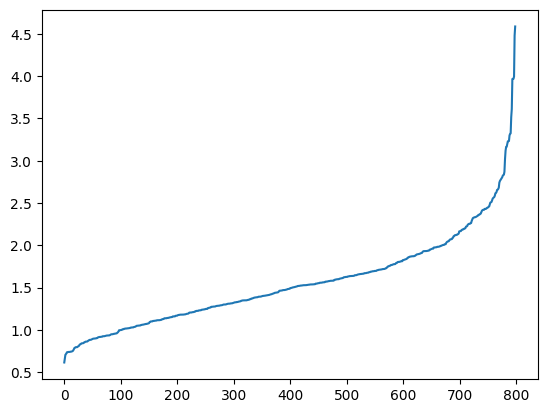

In [90]:
from sklearn.neighbors import NearestNeighbors 
knn_model = NearestNeighbors(n_neighbors = 4)
neighbours = knn_model.fit(dataset_embedded) 
distances,_ = neighbours.kneighbors(dataset_embedded)
fourth_nearest_distances = distances[:,3]

#Plotting the sorted distances
plt.plot(np.arange(len(distances)),np.sort(fourth_nearest_distances))
plt.show()

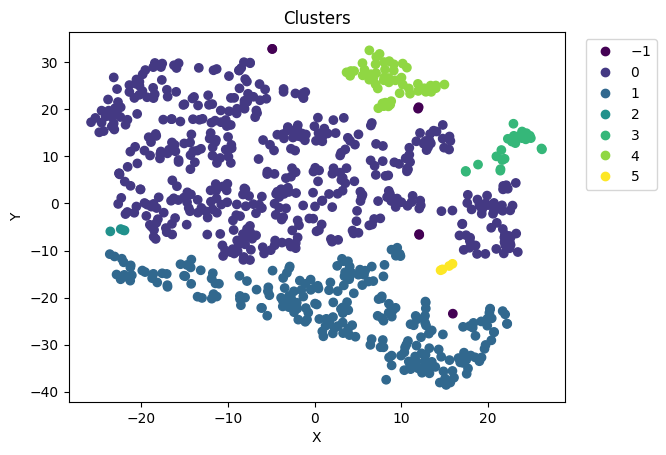

In [91]:
from sklearn.cluster import DBSCAN

clusters = DBSCAN(eps = 3, min_samples = 2*len(dataset_embedded.columns)).fit(dataset_embedded)
labels = clusters.labels_
#print(labels)

#Plotting the clusters
scatter = plt.scatter(dataset_embedded[0], dataset_embedded[1], c = labels)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Clusters")
plt.legend(*scatter.legend_elements(),loc="upper right",bbox_to_anchor=(1.2,1))
plt.show()

In [92]:
d = {}
unique_nodes = np.array(G.nodes())
for i in range(len(unique_nodes)):
  d[unique_nodes[i]] = labels[i]

unique_labels = set(labels)
for l in unique_labels:
  nodes = [k for k,v in d.items() if v == l]
  if l != -1:
    print(f'Cluster {l} ({len(nodes)}) :',nodes)
  else:
    print(f'Noise points ({len(nodes)}) :',nodes)

Cluster 0 (472) : [1309, 1011, 1004, 1060, 1079, 1014, 1076, 1108, 1175, 1236, 1138, 1075, 1121, 1189, 1040, 1180, 1218, 1370, 1027, 1184, 1168, 1172, 1034, 1196, 1208, 1263, 1327, 1349, 1458, 1473, 1127, 1323, 1405, 1264, 1493, 1501, 1373, 1443, 1364, 1369, 1463, 1523, 1311, 1328, 1377, 1220, 1310, 1449, 1194, 1199, 1214, 1356, 1238, 1676, 1788, 1845, 1318, 1352, 1375, 1147, 1256, 1668, 1163, 1832, 1488, 1944, 1875, 1090, 1723, 1754, 1223, 1054, 1144, 2190, 1391, 1956, 1308, 1100, 2189, 2089, 1703, 1762, 1955, 1023, 1278, 1247, 1064, 1070, 1508, 1517, 1128, 1265, 1259, 1568, 1393, 1039, 1099, 1388, 1759, 1347, 1030, 1231, 1149, 1224, 1398, 1483, 1348, 1376, 1215, 1569, 1813, 1010, 1112, 1315, 1574, 1314, 1438, 1565, 1502, 1544, 1580, 1285, 1785, 1288, 1612, 1966, 1474, 1002, 1104, 1089, 1088, 1103, 1251, 1193, 1254, 1482, 1326, 1083, 1074, 1228, 2146, 2166, 1146, 1044, 2081, 1951, 1783, 1801, 1078, 1604, 2177, 1728, 1686, 1056, 1245, 1038, 1182, 1139, 1534, 1426, 1202, 1151, 1096, 166

### $\textbf{References}$
- $\href{https://towardsdatascience.com/complete-guide-to-understanding-node2vec-algorithm-4e9a35e5d147}{\text{Blog on Node2Vec}}$
- $\href{https://towardsdatascience.com/node2vec-explained-db86a319e9ab}{\text{Blog on Node2Vec Implementation}}$
- $\href{https://www.section.io/engineering-education/dbscan-clustering-in-python/}{\text{Tutorial on DBSCAN}}$